In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno  # New library for missing value visualization
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set visualization defaults
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_palette('viridis')

# Load dataset
df = pd.read_csv('../data/house_prices.csv')

# Check dimensions
print(f"Dataset dimensions: {df.shape}")
print(f"Number of features: {df.shape[1] - 1}")  # Excluding target variable

# Preview data
df.head()


Dataset dimensions: (2930, 83)
Number of features: 82


,Unnamed: 0,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


object     43
int64      29
float64    11
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 83 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       2930 non-null   int64  
 1   Order            2930 non-null   int64  
 2   PID              2930 non-null   int64  
 3   MS SubClass      2930 non-null   int64  
 4   MS Zoning        2930 non-null   object 
 5   Lot Frontage     2440 non-null   float64
 6   Lot Area         2930 non-null   int64  
 7   Street           2930 non-null   object 
 8   Alley            198 non-null    object 
 9   Lot Shape        2930 non-null   object 
 10  Land Contour     2930 non-null   object 
 11  Utilities        2930 non-null   object 
 12  Lot Config       2930 non-null   object 
 13  Land Slope       2930 non-null   object 
 14  Neighborhood     2930 non-null   object 
 15  Condition 1      2930 non-null   objec

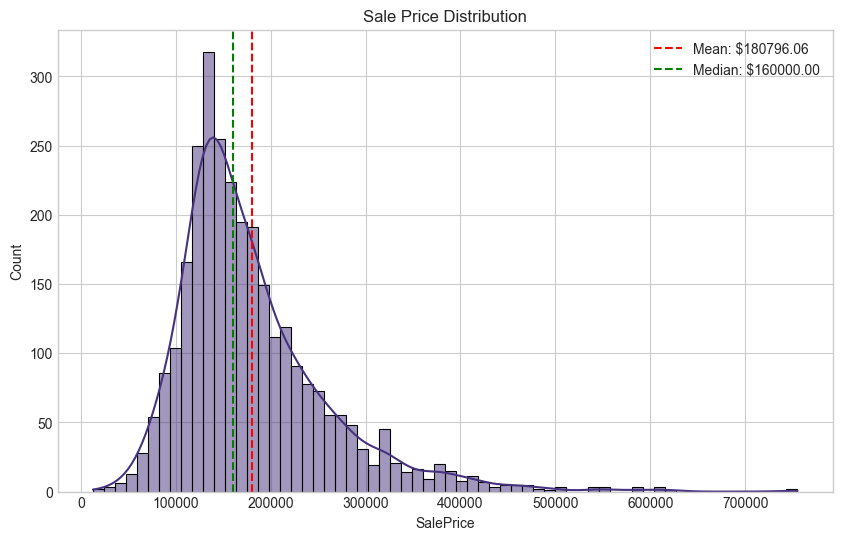

Skewness of SalePrice: 1.7435


In [2]:
# Check data types
print(df.dtypes.value_counts())

# Quick info summary
df.info()

# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"Number of numeric features: {len(numeric_cols)}")
print(f"Number of categorical features: {len(cat_cols)}")

# Check target variable (SalePrice) distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Sale Price Distribution')
plt.axvline(df['SalePrice'].mean(), color='r', linestyle='--', label=f"Mean: ${df['SalePrice'].mean():.2f}")
plt.axvline(df['SalePrice'].median(), color='g', linestyle='--', label=f"Median: ${df['SalePrice'].median():.2f}")
plt.legend()
plt.show()

# Check for skewness
print(f"Skewness of SalePrice: {df['SalePrice'].skew():.4f}")


               Missing Count    Percent
Pool QC                 2917  99.556314
Misc Feature            2824  96.382253
Alley                   2732  93.242321
Fence                   2358  80.477816
Mas Vnr Type            1775  60.580205
Fireplace Qu            1422  48.532423
Lot Frontage             490  16.723549
Garage Qual              159   5.426621
Garage Cond              159   5.426621
Garage Yr Blt            159   5.426621


<Figure size 1400x800 with 0 Axes>

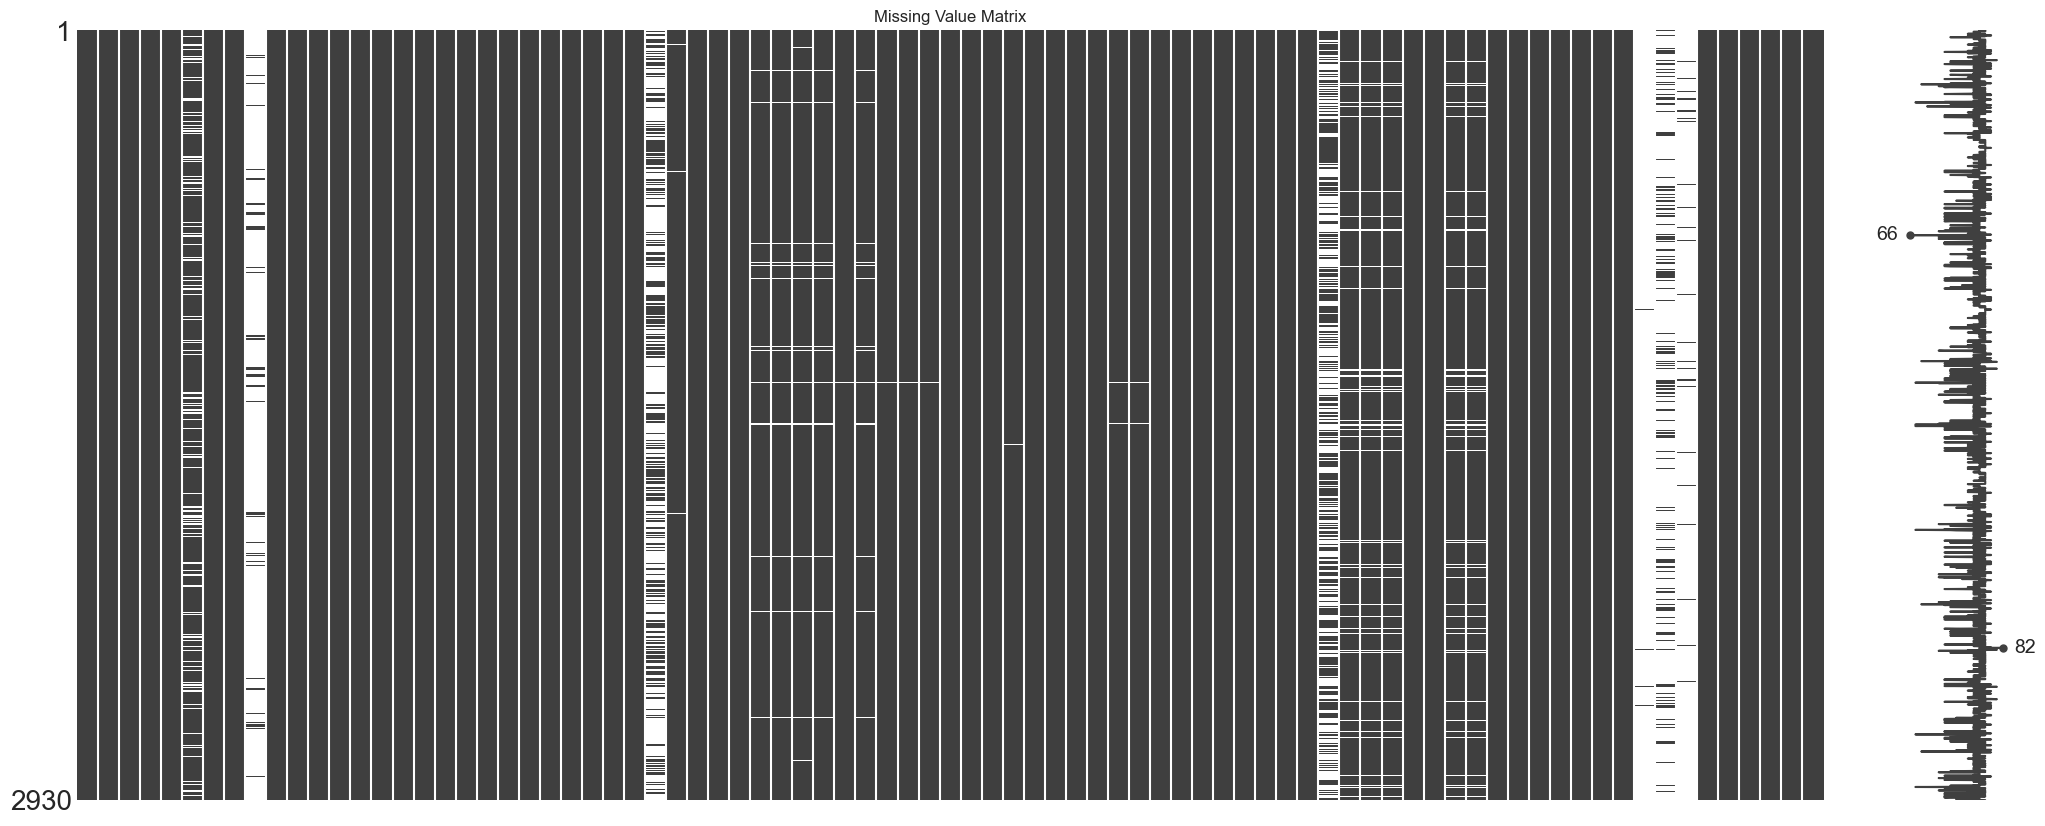

<Figure size 1400x800 with 0 Axes>

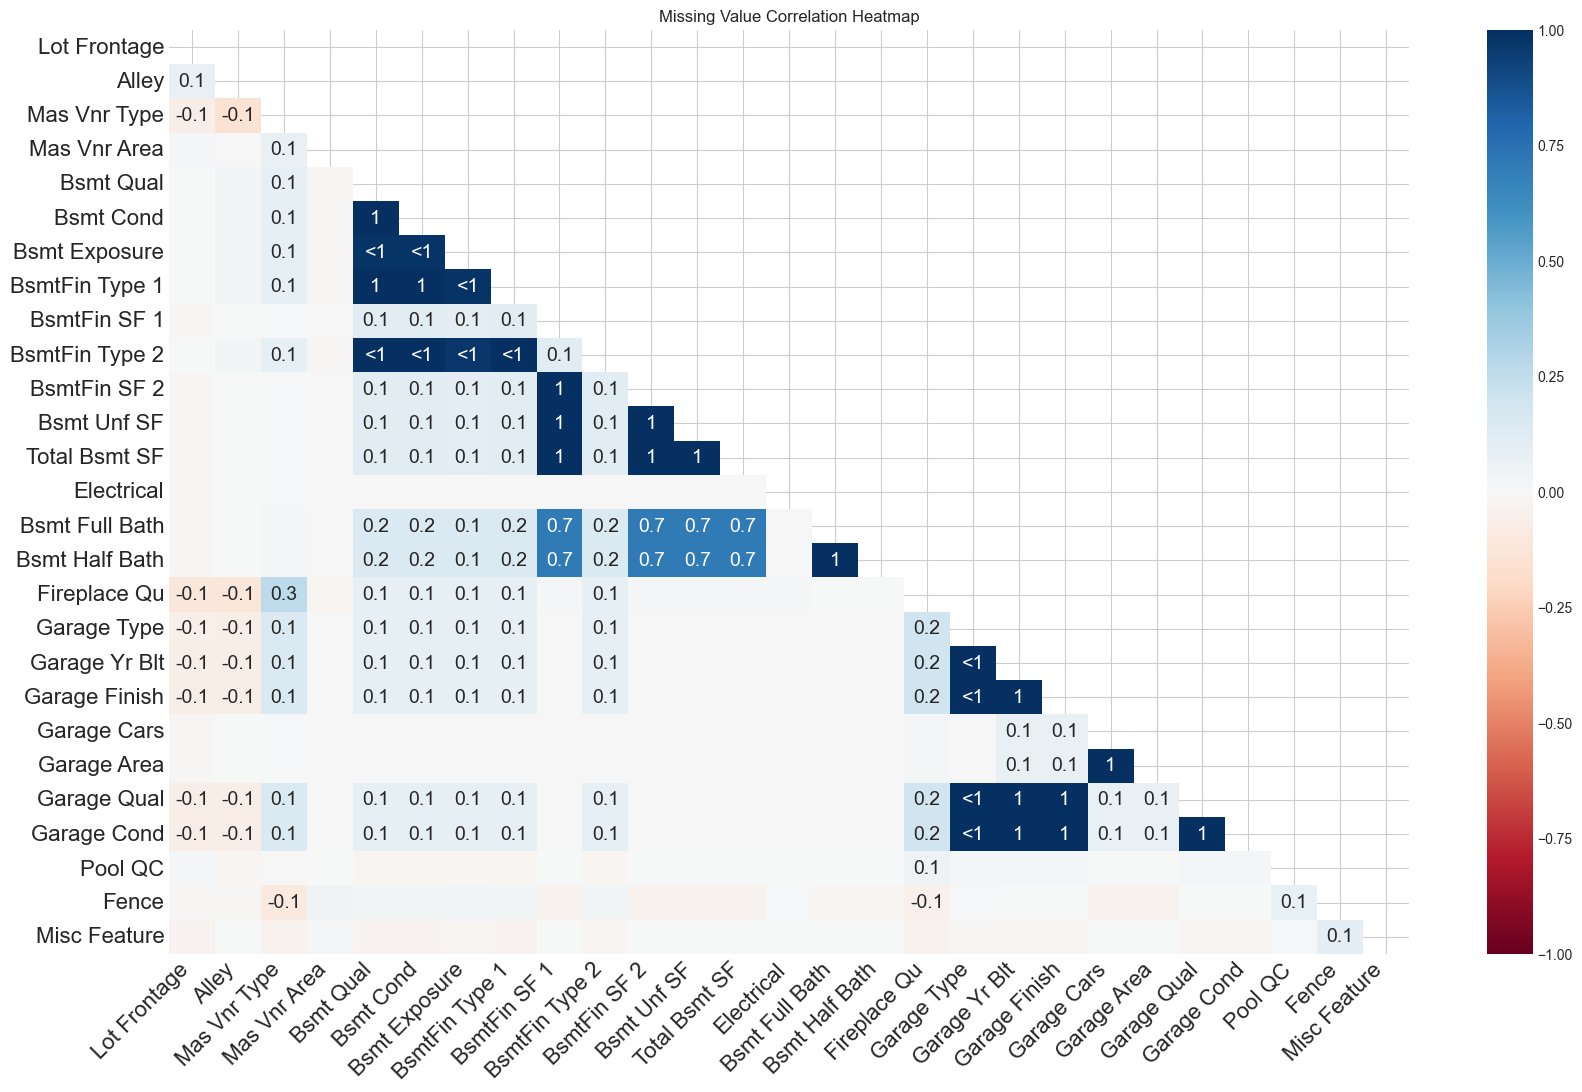

In [3]:
# Check overall missingness
missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing, 'Percent': missing_percent})
print(missing_df[missing_df['Missing Count'] > 0].head(10))

# Visualize missing values
plt.figure(figsize=(14, 8))
msno.matrix(df)
plt.title('Missing Value Matrix')
plt.show()

# Visualize missing value correlations
plt.figure(figsize=(14, 8))
msno.heatmap(df)
plt.title('Missing Value Correlation Heatmap')
plt.show()


In [4]:
# Check overall missingness
missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing, 'Percent': missing_percent})
print(missing_df[missing_df['Missing Count'] > 0].head(10))



               Missing Count    Percent
Pool QC                 2917  99.556314
Misc Feature            2824  96.382253
Alley                   2732  93.242321
Fence                   2358  80.477816
Mas Vnr Type            1775  60.580205
Fireplace Qu            1422  48.532423
Lot Frontage             490  16.723549
Garage Qual              159   5.426621
Garage Cond              159   5.426621
Garage Yr Blt            159   5.426621


In [5]:
# Analyze a feature with many missing values (e.g., Pool Quality)
print(df['Pool QC'].value_counts(dropna=False))

# Check related features
print(df['Pool Area'].value_counts())


Pool QC
NaN    2917
Ex        4
Gd        4
TA        3
Fa        2
Name: count, dtype: int64
Pool Area
0      2917
144       1
480       1
576       1
555       1
368       1
444       1
228       1
561       1
519       1
648       1
800       1
512       1
738       1
Name: count, dtype: int64


In [6]:
# Handling Missing Values by Type
# STRATEGY 1: Fill NA where it means "None" or "Not Applicable"
none_cols = ['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu', 'Garage Type', 
             'Garage Finish', 'Garage Qual', 'Garage Cond', 'Bsmt Qual', 'Bsmt Cond',
             'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Mas Vnr Type']

for col in none_cols:
    df[col] = df[col].fillna('None')

In [7]:
# STRATEGY 2: Fill NA with 0 for features where NA means no feature
zero_cols = [
    'Garage Yr Blt', 'Garage Area', 'Garage Cars',
    'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
    'Bsmt Full Bath', 'Bsmt Half Bath', 'Mas Vnr Area'
]

for col in zero_cols:
    df[col] = df[col].fillna(0)

In [8]:
# STRATEGY 3: Fill NA with mode for categorical variables
mode_cols = ['MS Zoning', 'Electrical', 'Kitchen Qual', 'Exterior 1st', 'Exterior 2nd', 'Sale Type']

for col in mode_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [9]:
remaining_na = df.isnull().sum().sum()
print(f"Remaining missing values: {remaining_na}")
if remaining_na > 0:
    print(df.isnull().sum()[df.isnull().sum() > 0])

Remaining missing values: 490
Lot Frontage    490
dtype: int64


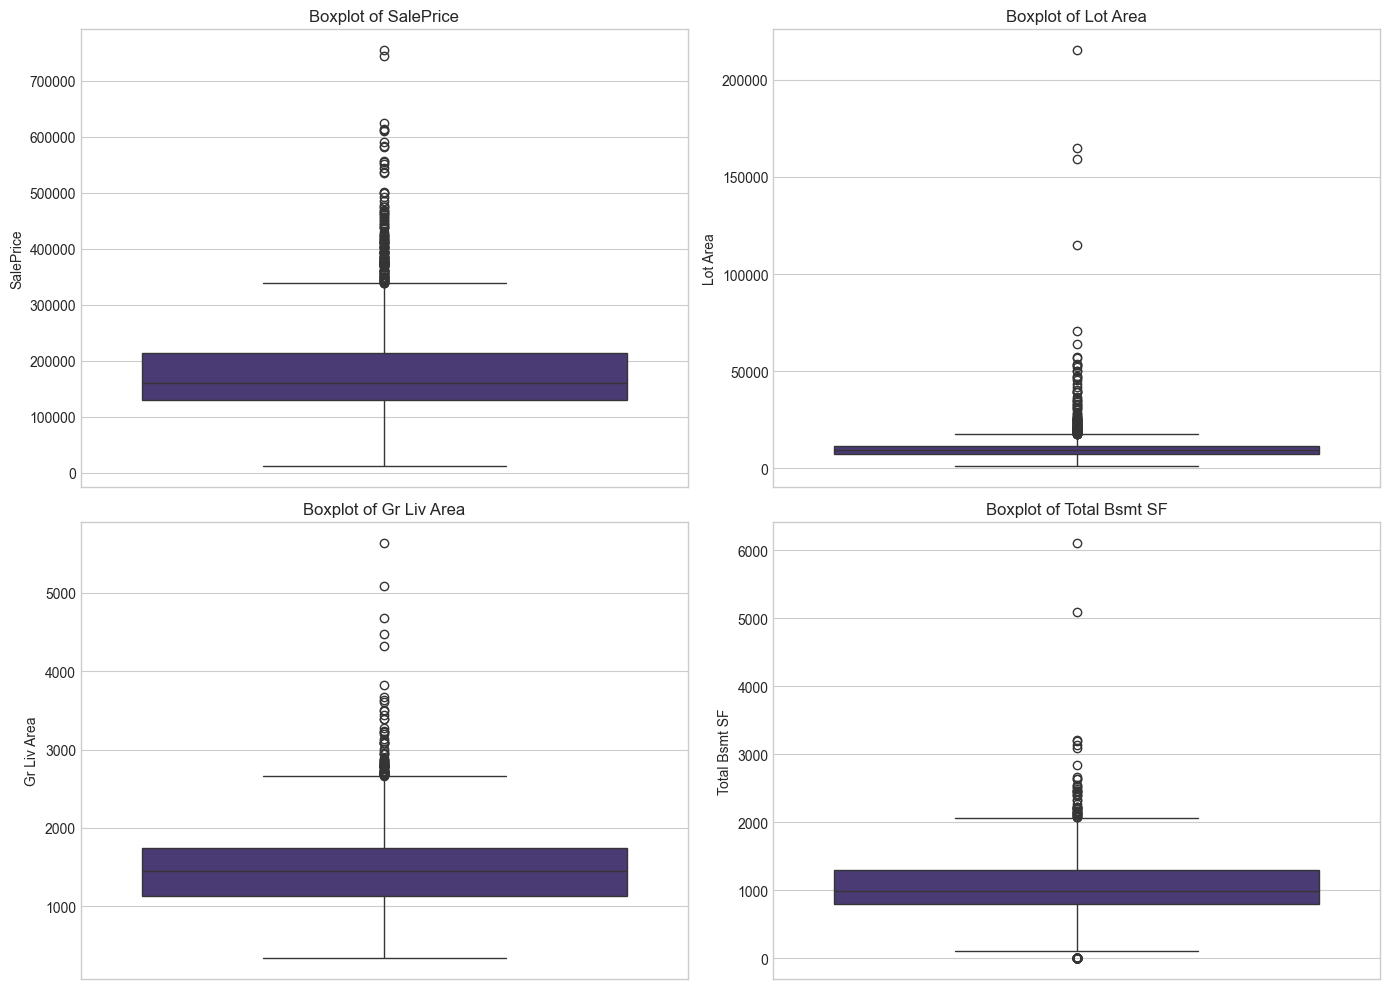

In [10]:
# Outliers Detection
plt.figure(figsize=(14, 10))
cols_to_plot = ['SalePrice', 'Lot Area', 'Gr Liv Area', 'Total Bsmt SF']  # Use correct column names
for i, col in enumerate(cols_to_plot):
    plt.subplot(2, 2, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [11]:
# Z-score method for outlier detection
from scipy import stats
z_scores = stats.zscore(df[numeric_cols])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
outliers = df[~filtered_entries]
print(f"Number of potential outliers detected via Z-score: {len(outliers)}")

Number of potential outliers detected via Z-score: 2930


In [12]:
# IQR method for SalePrice outliers
if 'df' not in globals():
	raise NameError("The dataframe 'df' is not defined. Please run the cell where 'df' is loaded.")

Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
price_outliers = df[(df['SalePrice'] < lower_bound) | (df['SalePrice'] > upper_bound)]
print(f"Number of price outliers via IQR method: {len(price_outliers)}")

Number of price outliers via IQR method: 137


Text(0, 0.5, 'Sale Price')

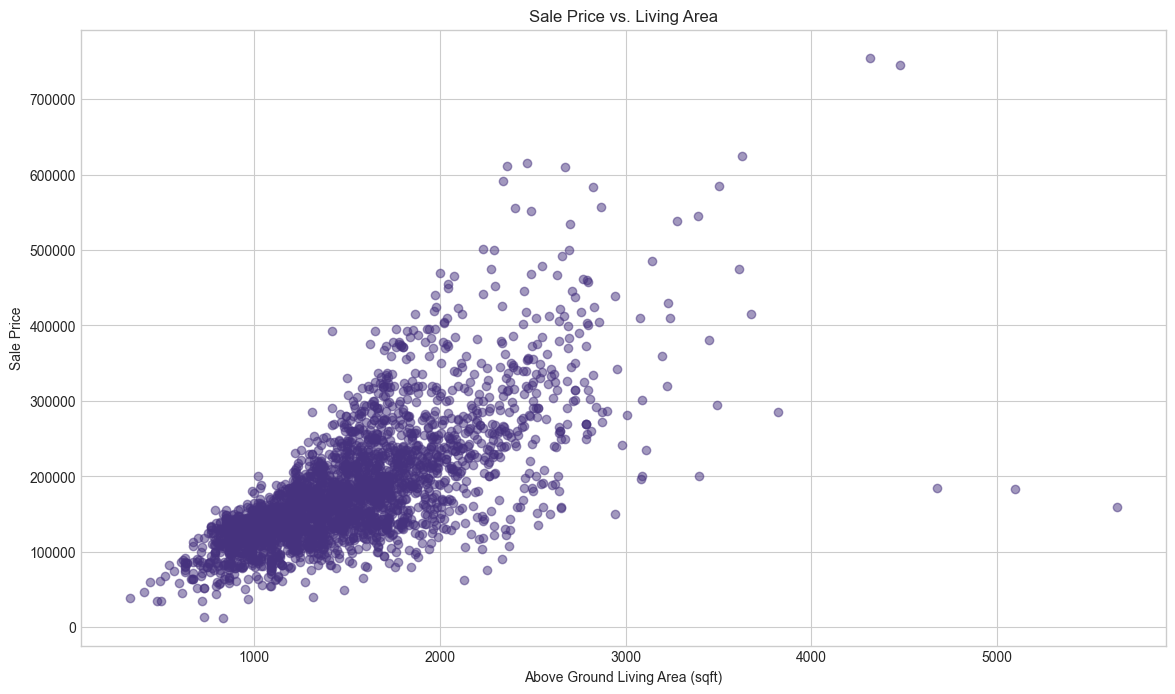

In [13]:
# Visualize an outlier detection
plt.figure(figsize=(14, 8))
plt.scatter(df['Gr Liv Area'], df['SalePrice'], alpha=0.5)
plt.title('Sale Price vs. Living Area')
plt.xlabel('Above Ground Living Area (sqft)')
plt.ylabel('Sale Price')

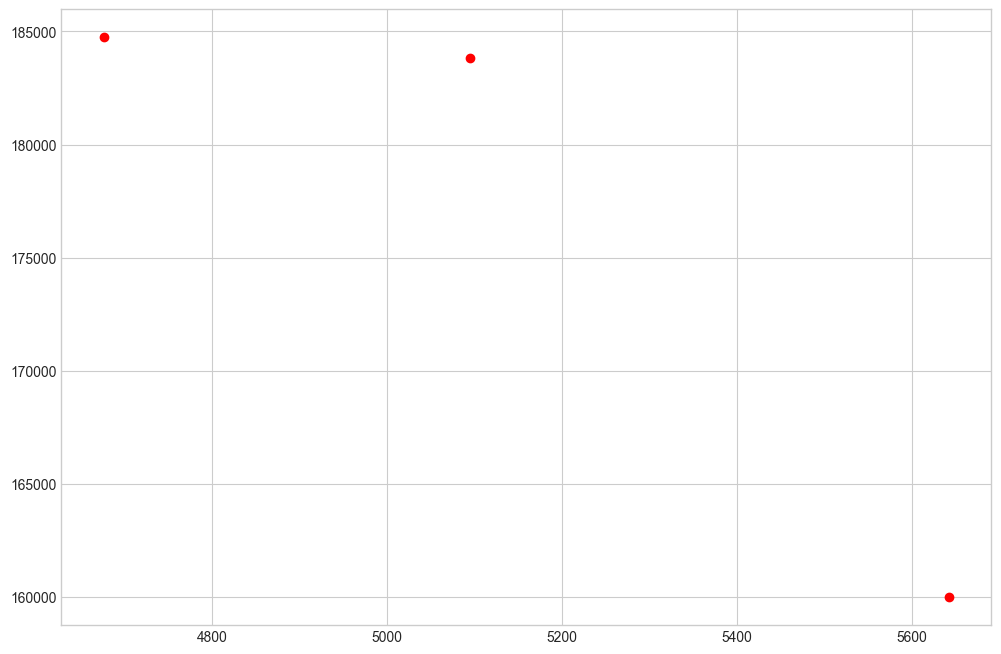

Found 3 unusual houses with large living area but low price.


In [ ]:
# Highlight outliers
outliers = df[(df['Gr Liv Area'] > 4000) & (df['SalePrice'] < 300000)]
plt.scatter(outliers['Gr Liv Area'], outliers['SalePrice'], color='r')
plt.show()

print(f"Found {len(outliers)} unusual houses with large living area but low price")